# LOAN PREDICTION

In this project, I will try to design a model with Classification machine learning methods that can make predictions for a financial institution about whether loan customers will be able to pay their loan debts. This dataset is taken from Kaggle.com.

<img src='https://d28wu8o6itv89t.cloudfront.net/images/Typesofloaninindiapng-1591776023072.png'>
<br>
<img src='https://signalscv.s3.us-west-1.amazonaws.com/wp-content/uploads/2020/03/09093452/1-3-750x375.jpg'> <br>
<br>
<a href='https://www.kaggle.com/datasets/omkar5/dataset-for-bank-loan-prediction/data' target= _blank> Can get data from this link

### Data Dictionary

The dataset consists of the following fields:<br>
• **Loan ID**: A unique Identifier for the loan information.<br>
• **Customer ID**: A unique identifier for the customer. Customers may have more than one loan.<br>
• **Loan Status**: A categorical variable indicating if the loan was paid back or defaulted.<br>
• **Current Loan Amount**: This is the loan amount that was either completely paid off, or the amount that was defaulted.<br>
• **Term**: A categorical variable indicating if it is a short term or long term loan.<br>
• **Credit Score**: A value between 0 and 800 indicating the riskiness of the borrowers credit history.<br>
• **Years in current job**: A categorical variable indicating how many years the customer has been in their current job.<br>
• **Home Ownership**: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage<br>
• **Annual Income**: The customer's annual income<br>
• **Purpose**: A description of the purpose of the loan.<br>
• **Monthly Debt**: The customer's monthly payment for their existing loans<br>
• **Years of Credit History**: The years since the first entry in the customer’s credit history <br>
• **Months since last delinquent**: Months since the last loan delinquent payment<br>
• **Number of Open Accounts**: The total number of open credit cards<br>
• **Number of Credit Problems**: The number of credit problems in the customer records.<br>
• **Current Credit Balance**: The current total debt for the customer<br>
• **Maximum Open Credit**: The maximum credit limit for all credit sources.<br>
• **Bankruptcies**: The number of bankruptcies<br>
• **Tax Liens**: The number of tax liens.<br>

### Importing of essential packages

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



C:\Users\Ramazan & Selma\AppData\Local\Temp\ipykernel_26540\2496255997.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('LoansTrainingSet.csv')


### Reading data

In [90]:
df = pd.read_csv('LoansTrainingSet.csv')

C:\Users\Ramazan & Selma\AppData\Local\Temp\ipykernel_26540\3228652955.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('LoansTrainingSet.csv')


### EDA

In [91]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [92]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"$2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,256984.0,1.371331e+07,3.438131e+07,505.0,8299.0,14298.0,24367.0,99999999.0
Credit Score,195308.0,1.251116e+03,1.762017e+03,585.0,714.0,733.0,744.0,7510.0
Annual Income,195308.0,7.195272e+04,5.887757e+04,0.0,44321.0,61242.0,86462.0,8713547.0
Years of Credit History,256984.0,1.829019e+01,7.075747e+00,3.4,13.5,17.0,21.7,70.5
Months since last delinquent,116601.0,3.488145e+01,2.185417e+01,0.0,16.0,32.0,51.0,176.0
Number of Open Accounts,256984.0,1.110627e+01,4.982982e+00,0.0,8.0,10.0,14.0,76.0
Number of Credit Problems,256984.0,1.566284e-01,4.607309e-01,0.0,0.0,0.0,0.0,11.0
Current Credit Balance,256984.0,1.540656e+04,1.966506e+04,0.0,5974.0,11078.0,19319.0,1731412.0
Bankruptcies,256455.0,1.103156e-01,3.362287e-01,0.0,0.0,0.0,0.0,7.0
Tax Liens,256961.0,2.720257e-02,2.459499e-01,0.0,0.0,0.0,0.0,11.0


In [96]:
data["Loan Status"].value_counts()

Loan Status
Fully Paid     176191
Charged Off     80793
Name: count, dtype: int64

In [97]:
data.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

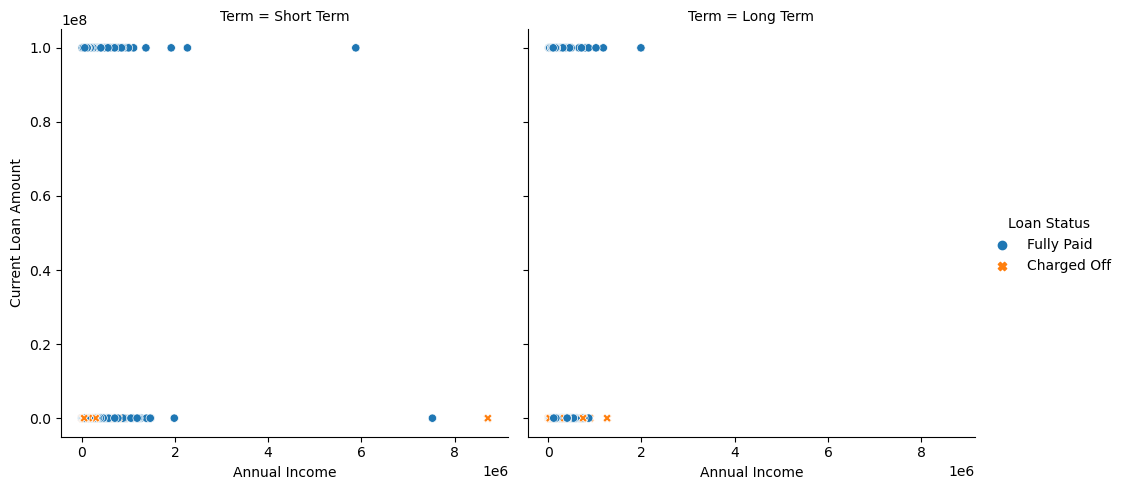

In [98]:
sns.relplot(
    data=data,
    x="Annual Income", y="Current Loan Amount", col="Term",
    hue="Loan Status", style="Loan Status",
)

In [56]:

data['Maximum Open Credit'].replace('0', 0,inplace=True)
data['Maximum Open Credit'].replace('#VALUE!', np.nan,inplace=True)   
data['Maximum Open Credit'] = data['Maximum Open Credit'].astype(float)

In [57]:
# divide by 10 to Credit Score values that greater than 1000

data["Credit Score"] = data["Credit Score"].apply(lambda x: x / 10 if x > 1000 else x)

In [58]:
# fill null values of Tax Liens with 0.0 then convert this column to a int64

data["Tax Liens"].fillna(0.0, inplace=True)
data["Tax Liens"] = data["Tax Liens"].astype(int)


In [59]:
# fill null values of Bankruptcies with 0.0 then convert this column to a int64

data["Bankruptcies"].fillna(0.0, inplace=True)
data["Bankruptcies"] = data["Bankruptcies"].astype(int)

In [60]:
# conver '< 1 year' values with 0 in the 'Years in current job' column

data['Years in current job'] = data['Years in current job'].replace('< 1 year', '0', regex=True)

In [61]:
# remove all nonnumeric values from "Years in current job" column

data['Years in current job'] = data['Years in current job'].str.extract('(\d+)', expand=False).astype(float)

In [62]:
# remove $ sign from Monthly Dept column

data["Monthly Debt"] = data["Monthly Debt"].str.replace('$', '')

# remove , sign from Monthly Dept column

data["Monthly Debt"] = data["Monthly Debt"].str.replace(',', '')

# remove spaces from beginning of Monthly Dept values and end of monthly depts 

data["Monthly Debt"] = data["Monthly Debt"].str.strip()

In [63]:
data["Monthly Debt"] = data["Monthly Debt"].astype(float)

In [64]:
# make null the values that less than 1 of monthly dept column

data["Monthly Debt"] = data["Monthly Debt"].mask(data["Monthly Debt"] < 1, np.nan)

In [65]:
#replace "other" values of Purpose column with "Other" value

data['Purpose'].replace('other', 'Other',inplace=True)

In [66]:
data = data.drop(['Loan ID', 'Customer ID'], axis=1)

In [68]:
#convert 99999999 values in 'Current Loan Amount' to nan values

data["Current Loan Amount"] = data["Current Loan Amount"].replace(99999999, np.nan)

#fill nan values in "Current Loan Amount" with the best approtiate values to predict the most accurate values for loan status

#data["Current Loan Amount"] = data["Current Loan Amount"].fillna(data["Current Loan Amount"].mean())

In [69]:
# is there any dublicater 

data.duplicated().sum() # drop duplicates # exists
data.drop_duplicates()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,11520.0,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056.0,0,0
1,Fully Paid,3441.0,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,NaN,17,0,6262,19149.0,0,0
2,Fully Paid,21029.0,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335.0,0,0
3,Fully Paid,18743.0,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915.0,0,0
4,Fully Paid,11731.0,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256977,Charged Off,11953.0,Short Term,717.0,10.0,Home Mortgage,39844.0,Debt Consolidation,982.82,11.7,NaN,9,1,4176,4783.0,1,0
256979,Fully Paid,3911.0,Short Term,NaN,2.0,Rent,NaN,Debt Consolidation,1706.58,19.9,NaN,16,0,43992,44080.0,0,0
256980,Fully Paid,5078.0,Short Term,737.0,10.0,Own Home,77186.0,Debt Consolidation,1376.47,19.1,47.0,9,0,1717,9758.0,0,0
256981,Charged Off,12116.0,Short Term,746.0,9.0,Home Mortgage,52504.0,Debt Consolidation,297.96,15.1,82.0,8,0,3315,20090.0,0,0


In [71]:
data.info(), data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  object 
 1   Current Loan Amount           221774 non-null  float64
 2   Term                          256984 non-null  object 
 3   Credit Score                  195308 non-null  float64
 4   Years in current job          245508 non-null  float64
 5   Home Ownership                256984 non-null  object 
 6   Annual Income                 195308 non-null  float64
 7   Purpose                       256984 non-null  object 
 8   Monthly Debt                  256723 non-null  float64
 9   Years of Credit History       256984 non-null  float64
 10  Months since last delinquent  116601 non-null  float64
 11  Number of Open Accounts       256984 non-null  int64  
 12  Number of Credit Problems     256984 non-nul

(None,
 Loan Status                          0
 Current Loan Amount              35210
 Term                                 0
 Credit Score                     61676
 Years in current job             11476
 Home Ownership                       0
 Annual Income                    61676
 Purpose                              0
 Monthly Debt                       261
 Years of Credit History              0
 Months since last delinquent    140383
 Number of Open Accounts              0
 Number of Credit Problems            0
 Current Credit Balance               0
 Maximum Open Credit                  4
 Bankruptcies                         0
 Tax Liens                            0
 dtype: int64)

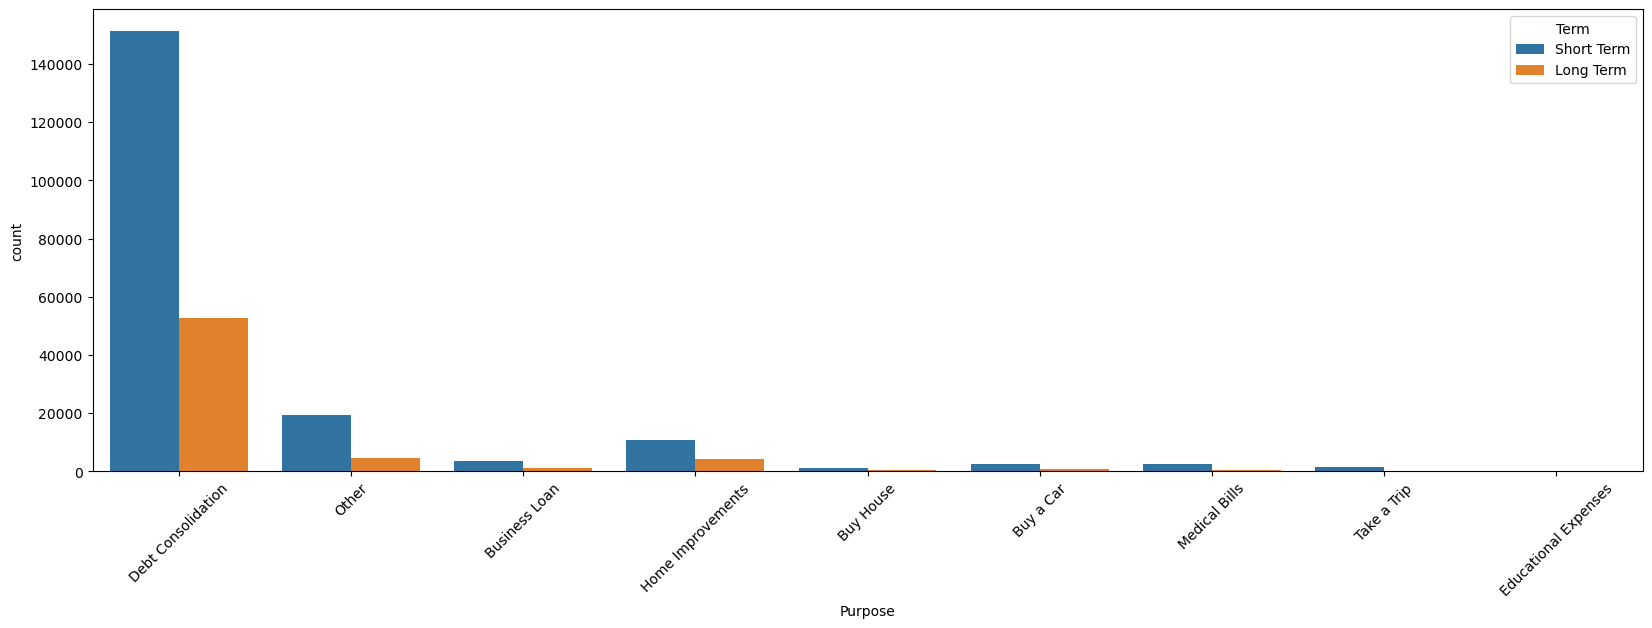

In [23]:
plt.figure(figsize=(20,6))
sns.countplot(x= data['Purpose'], hue = data.Term);
plt.xticks(rotation = 45);

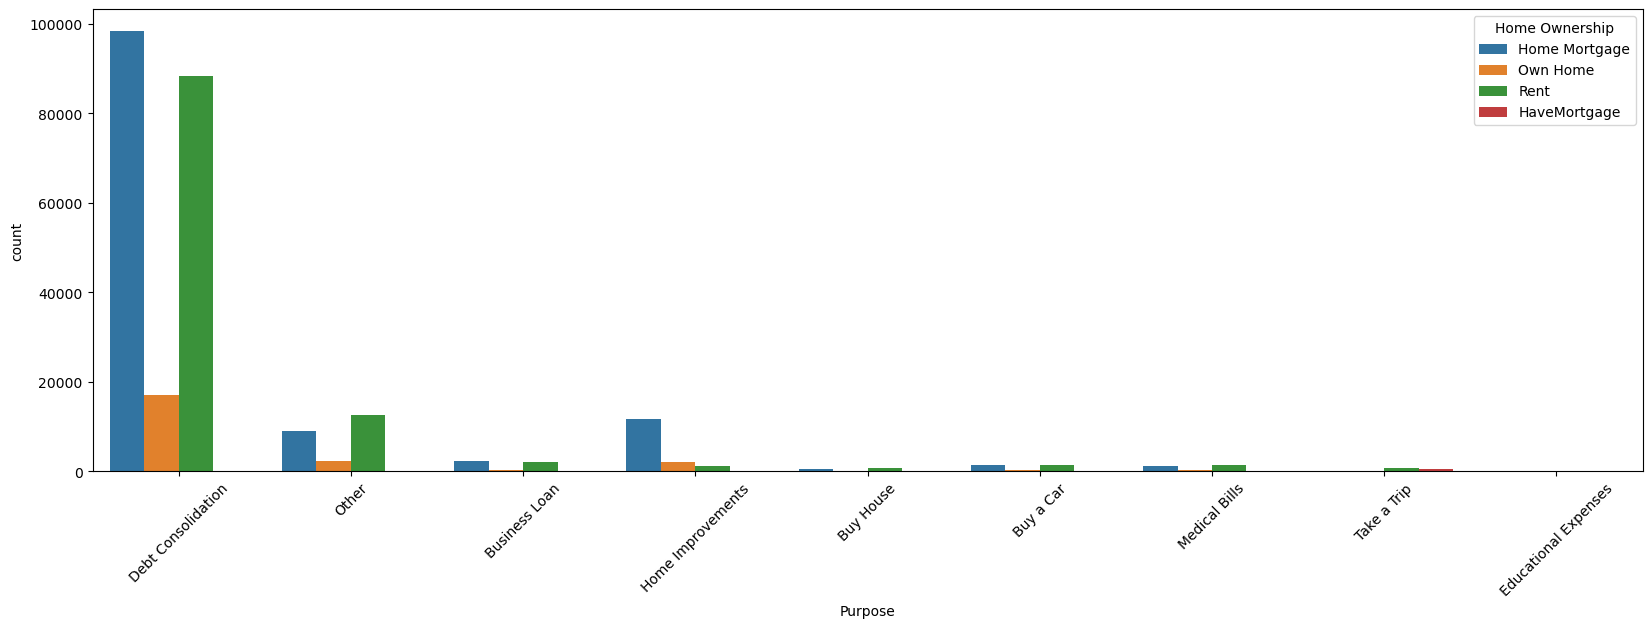

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(x= data['Purpose'], hue = data["Home Ownership"]);
plt.xticks(rotation = 45);

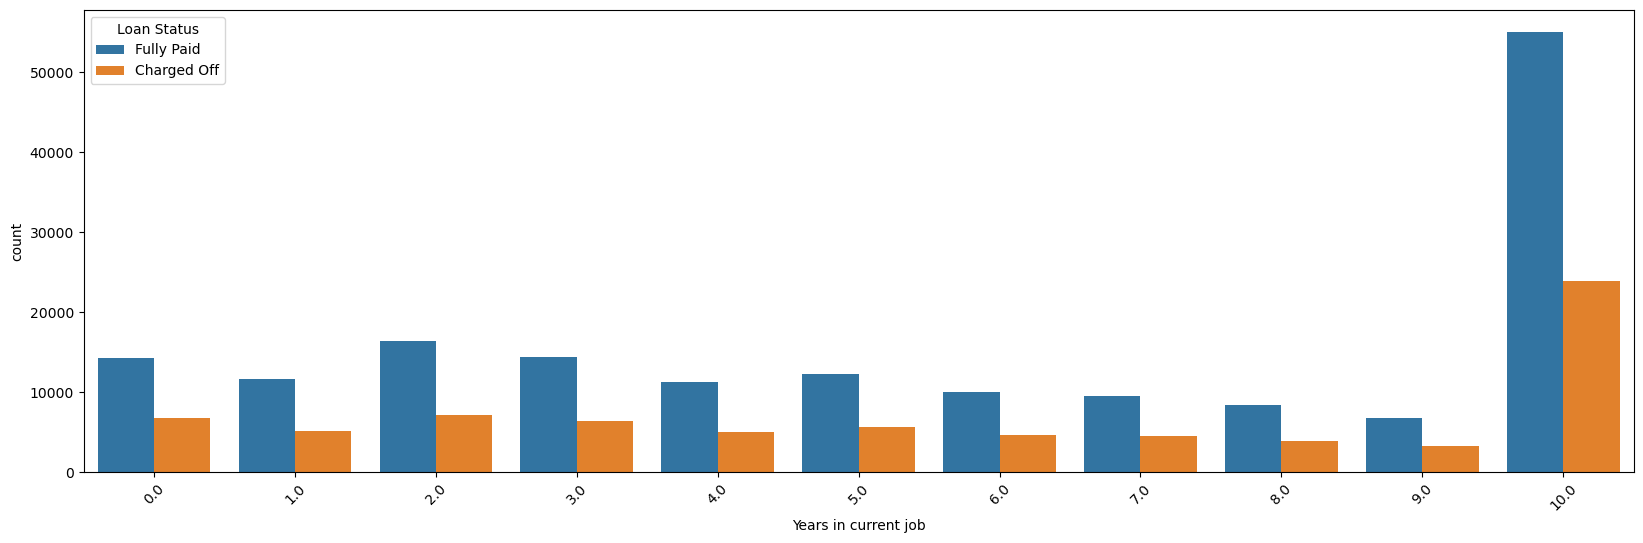

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(x= data['Years in current job'], hue = data["Loan Status"]);
plt.xticks(rotation = 45);

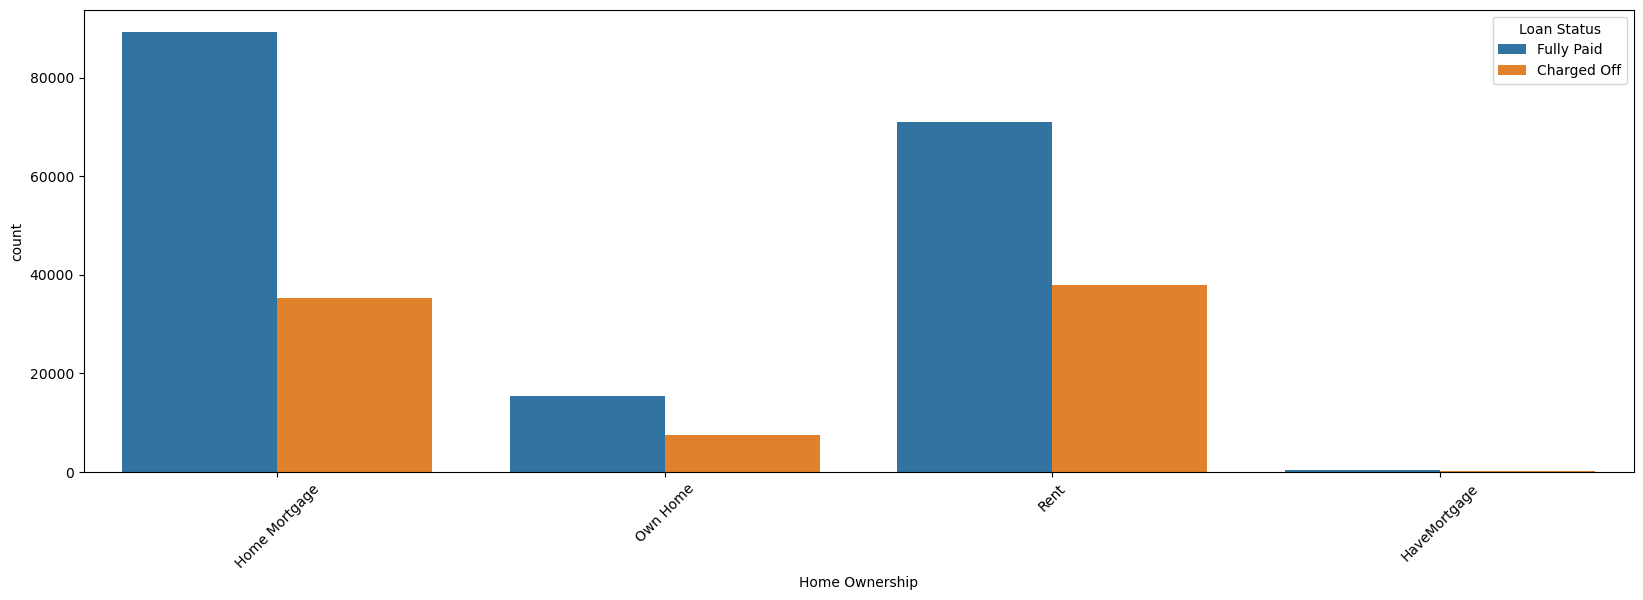

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(x= data['Home Ownership'], hue = data["Loan Status"]);
plt.xticks(rotation = 45);

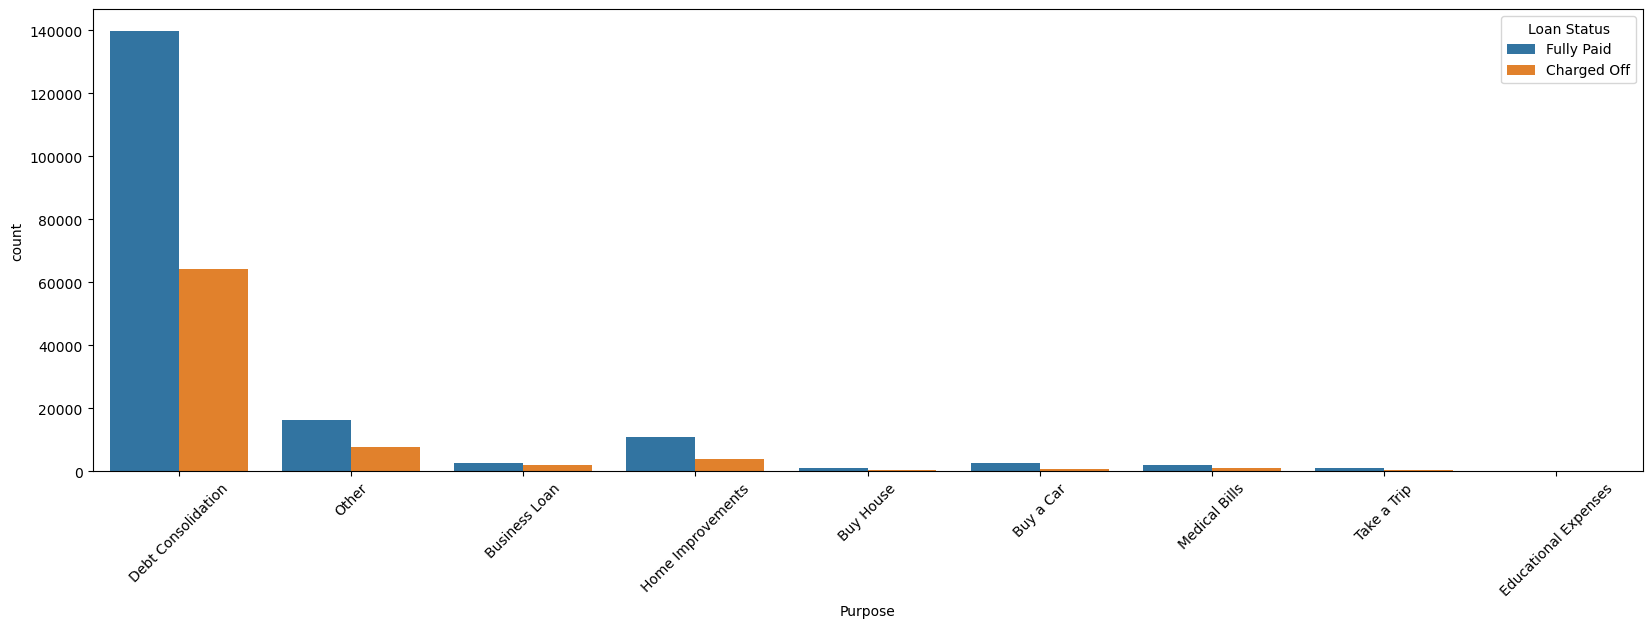

In [27]:
plt.figure(figsize=(20,6))
sns.countplot(x= data['Purpose'], hue = data["Loan Status"]);
plt.xticks(rotation = 45);

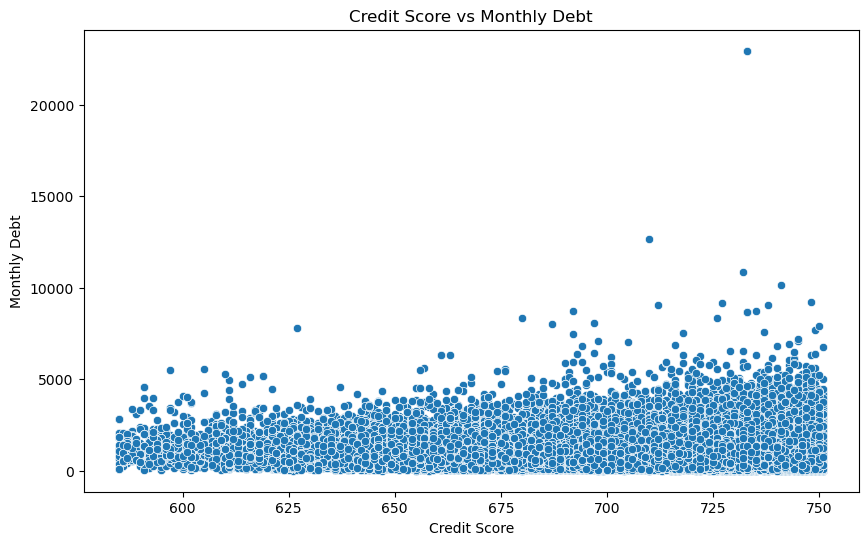

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Credit Score', y='Monthly Debt', data=data)
plt.title('Credit Score vs Monthly Debt')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


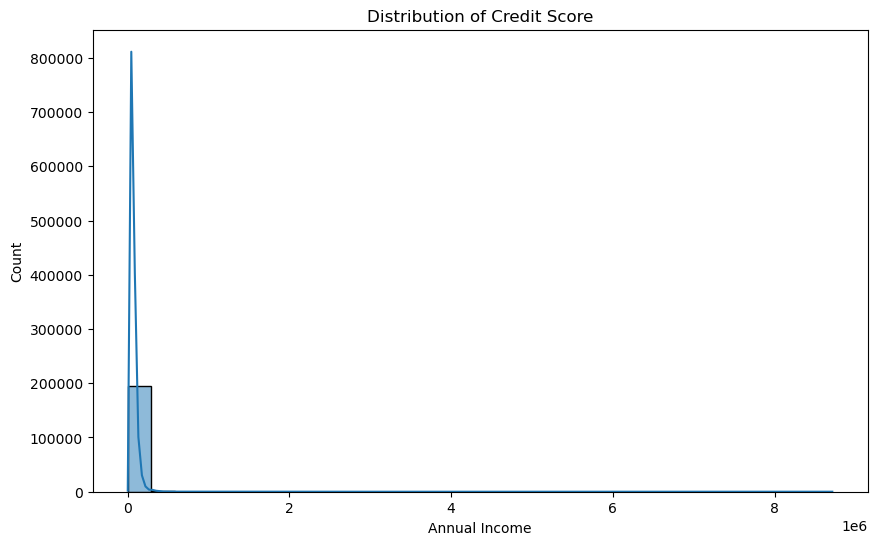

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Income'].dropna(), bins=30, kde=True)
plt.title('Distribution of Credit Score')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


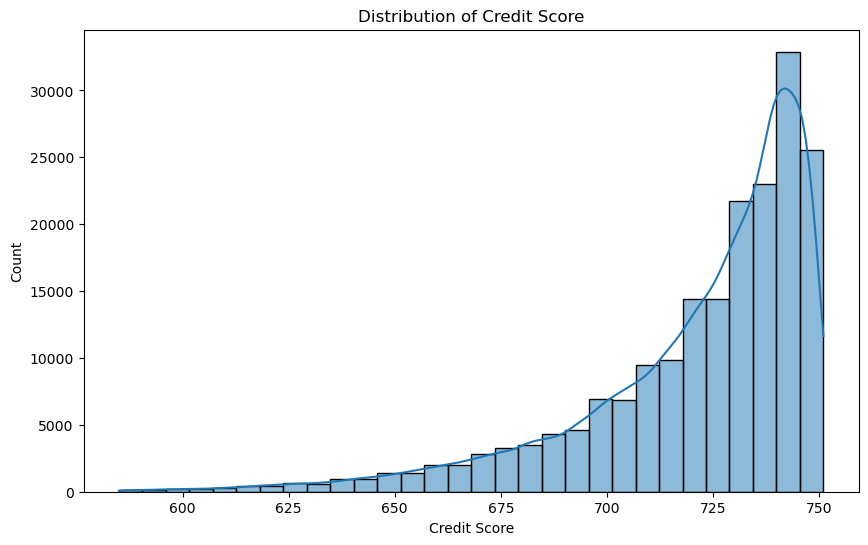

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Credit Score'].dropna(), bins=30, kde=True)
plt.title('Distribution of Credit Score')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


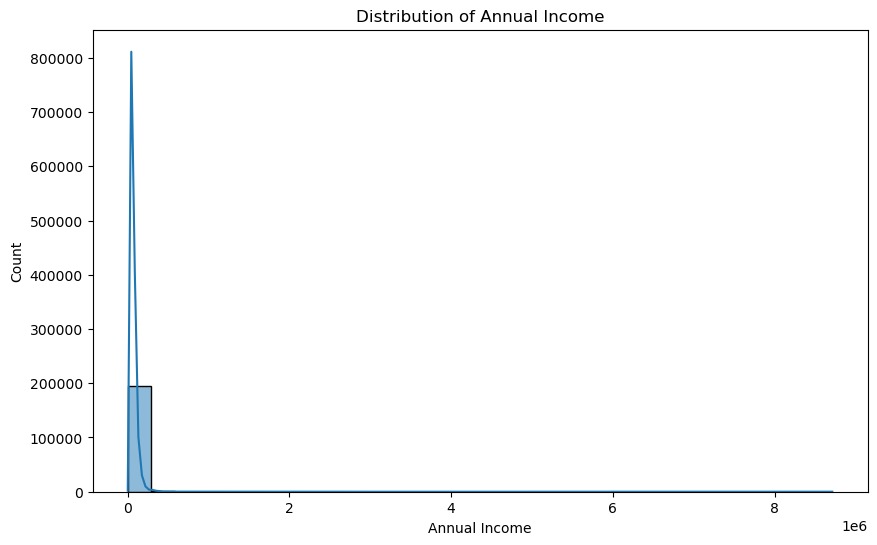

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Income'].dropna(), bins=30, kde=True)
plt.title('Distribution of Annual Income')
plt.show()

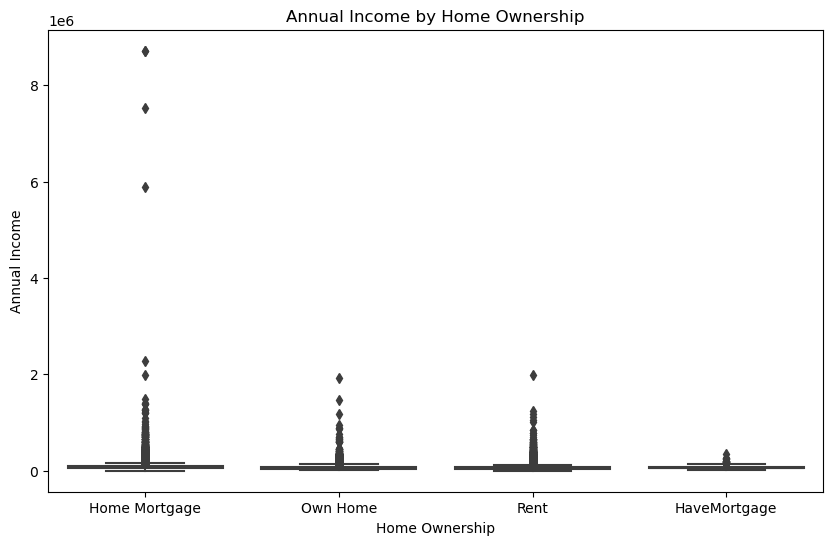

In [31]:
# Ev Sahipliği türlerine göre Yıllık Gelir ortalamalarını inceleyelim
plt.figure(figsize=(10, 6))
sns.boxplot(x='Home Ownership', y='Annual Income', data=data)
plt.title('Annual Income by Home Ownership')
plt.show()

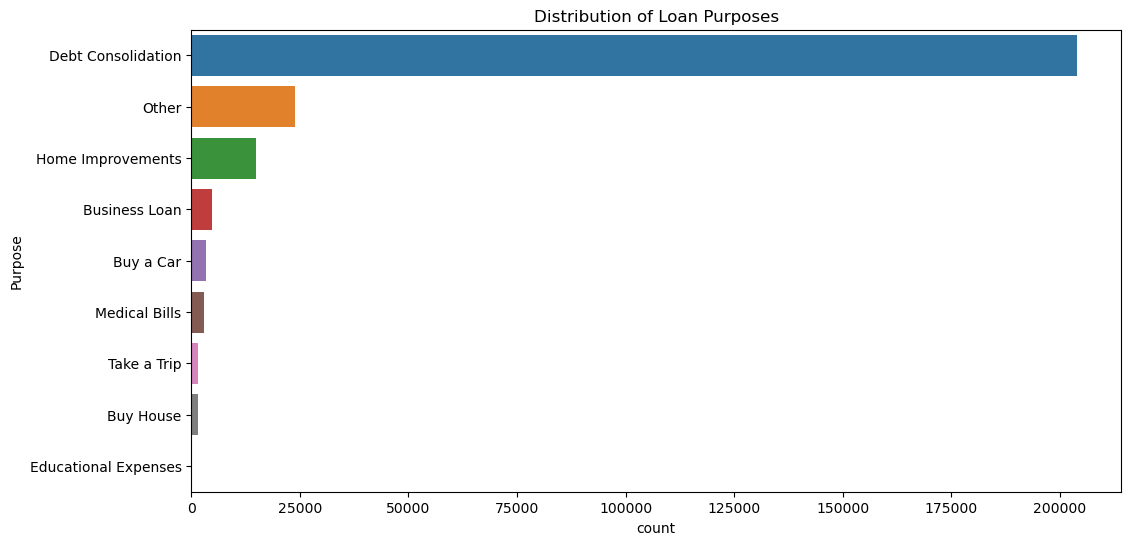

In [32]:
# Amaç sütunundaki kategorilerin dağılımını inceleyelim
plt.figure(figsize=(12, 6))
sns.countplot(y='Purpose', data=data, order = data['Purpose'].value_counts().index)
plt.title('Distribution of Loan Purposes')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

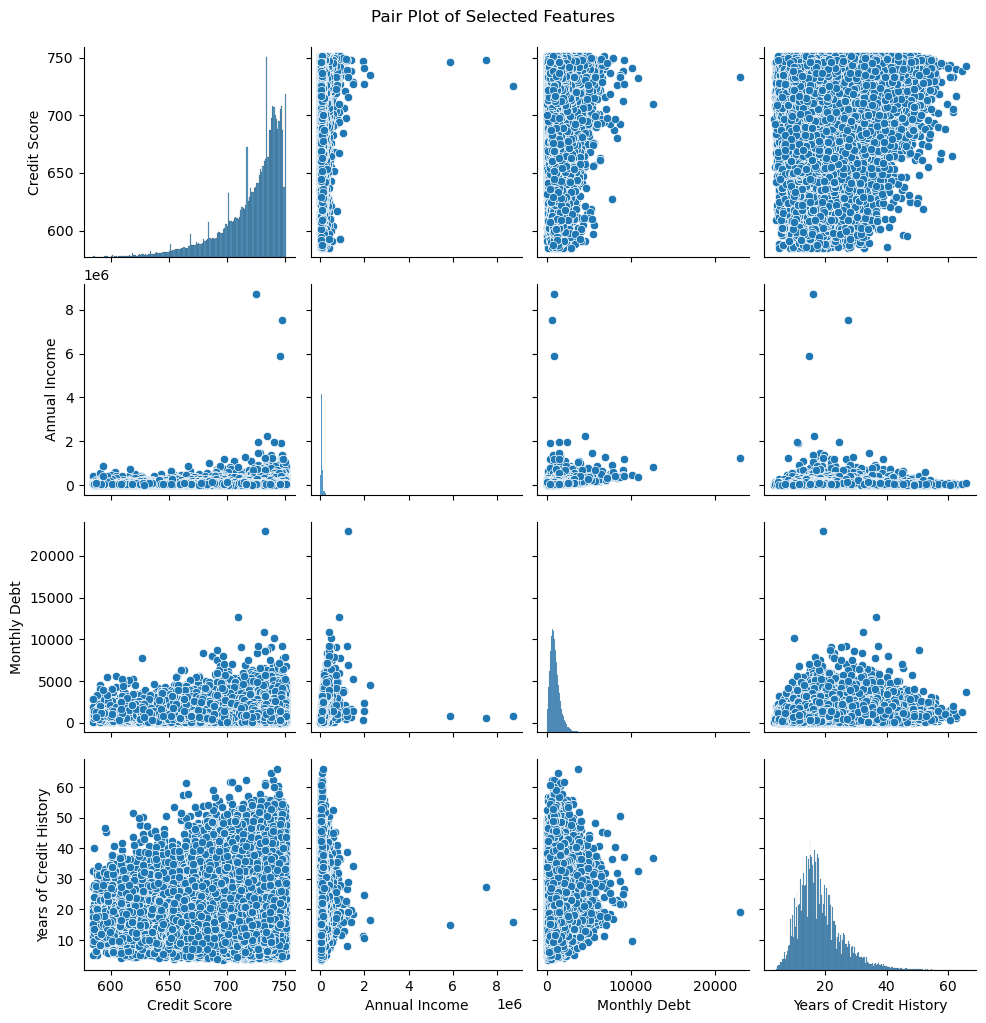

In [33]:
# Seçilen bazı önemli değişkenler arasındaki ilişkileri ve dağılımları inceleyelim
selected_columns = ['Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History']
sns.pairplot(data[selected_columns].dropna())
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

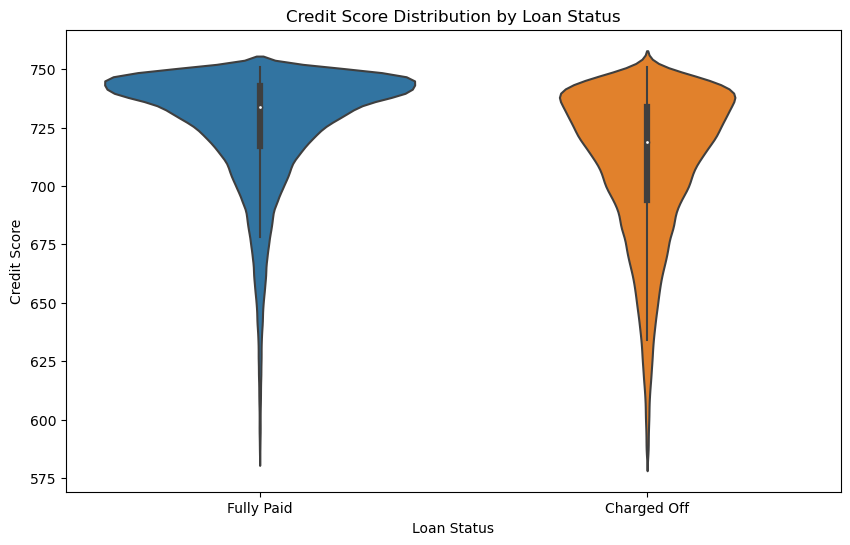

In [34]:
# Kredi Durumuna göre Kredi Skoru dağılımlarını inceleyelim
plt.figure(figsize=(10, 6))
sns.violinplot(x='Loan Status', y='Credit Score', data=data)
plt.title('Credit Score Distribution by Loan Status')
plt.show()

In [37]:
df = data.dropna()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69429 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   69429 non-null  object 
 1   Current Loan Amount           69429 non-null  float64
 2   Term                          69429 non-null  object 
 3   Credit Score                  69429 non-null  float64
 4   Years in current job          69429 non-null  float64
 5   Home Ownership                69429 non-null  object 
 6   Annual Income                 69429 non-null  float64
 7   Purpose                       69429 non-null  object 
 8   Monthly Debt                  69429 non-null  float64
 9   Years of Credit History       69429 non-null  float64
 10  Months since last delinquent  69429 non-null  float64
 11  Number of Open Accounts       69429 non-null  int64  
 12  Number of Credit Problems     69429 non-null  int64  
 13  Curre

In [51]:
abs(df.corr(numeric_only = True)['Current Loan Amount']).sort_values(ascending = False)

Current Loan Amount             1.000000
Monthly Debt                    0.412596
Annual Income                   0.344013
Current Credit Balance          0.325947
Credit Score                    0.277714
Number of Open Accounts         0.172131
Years of Credit History         0.141652
Years in current job            0.094569
Bankruptcies                    0.091736
Number of Credit Problems       0.061399
Months since last delinquent    0.040948
Maximum Open Credit             0.031790
Tax Liens                       0.021896
Name: Current Loan Amount, dtype: float64

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,69429.0,14132.591352,8260.980449,505.00,7921.00,12134.00,19546.00,35875.00
Credit Score,69429.0,717.232208,28.867410,585.00,704.00,726.00,739.00,751.00
Years in current job,69429.0,6.079534,3.625901,0.00,3.00,6.00,10.00,10.00
Annual Income,69429.0,76217.868427,56441.102336,5107.00,48038.00,65491.00,90873.00,7523240.00
Monthly Debt,69429.0,1010.206351,626.583340,1.06,584.03,896.13,1303.35,9039.57
Years of Credit History,69429.0,19.062336,6.674014,4.10,14.50,17.70,22.40,61.70
Months since last delinquent,69429.0,34.764119,21.886323,0.00,16.00,32.00,51.00,176.00
Number of Open Accounts,69429.0,11.538896,4.995726,0.00,8.00,11.00,14.00,55.00
Number of Credit Problems,69429.0,0.172982,0.504980,0.00,0.00,0.00,0.00,10.00
Current Credit Balance,69429.0,13852.895620,16440.503885,0.00,5429.00,10019.00,17354.00,575644.00


In [40]:
df.corr(numeric_only = True)['Credit Score'].sort_values(ascending = False)

Credit Score                    1.000000
Years of Credit History         0.074210
Months since last delinquent    0.045345
Maximum Open Credit             0.012959
Annual Income                   0.002719
Years in current job           -0.013612
Current Credit Balance         -0.021553
Tax Liens                      -0.021742
Bankruptcies                   -0.030363
Number of Open Accounts        -0.032910
Number of Credit Problems      -0.044303
Monthly Debt                   -0.097535
Current Loan Amount            -0.277714
Name: Credit Score, dtype: float64

In [41]:
df.corr(numeric_only = True)['Annual Income'].sort_values(ascending = False)

Annual Income                   1.000000
Monthly Debt                    0.464790
Current Loan Amount             0.344013
Current Credit Balance          0.292542
Years of Credit History         0.153072
Number of Open Accounts         0.115103
Tax Liens                       0.056595
Years in current job            0.054231
Maximum Open Credit             0.032963
Credit Score                    0.002719
Number of Credit Problems      -0.000210
Bankruptcies                   -0.046517
Months since last delinquent   -0.061431
Name: Annual Income, dtype: float64

In [42]:
df.corr(numeric_only = True)['Years in current job'].sort_values(ascending = False)

Years in current job            1.000000
Years of Credit History         0.176679
Monthly Debt                    0.094723
Current Loan Amount             0.094569
Current Credit Balance          0.076737
Annual Income                   0.054231
Number of Open Accounts         0.019233
Number of Credit Problems       0.012742
Bankruptcies                    0.012136
Maximum Open Credit             0.004912
Tax Liens                       0.002765
Months since last delinquent   -0.006128
Credit Score                   -0.013612
Name: Years in current job, dtype: float64

In [43]:
df.corr(numeric_only = True)['Months since last delinquent'].sort_values(ascending = False)

Months since last delinquent    1.000000
Bankruptcies                    0.110343
Number of Credit Problems       0.085103
Credit Score                    0.045345
Tax Liens                       0.003881
Maximum Open Credit             0.001381
Years in current job           -0.006128
Current Credit Balance         -0.023006
Number of Open Accounts        -0.033546
Current Loan Amount            -0.040948
Years of Credit History        -0.042738
Monthly Debt                   -0.053760
Annual Income                  -0.061431
Name: Months since last delinquent, dtype: float64

In [46]:
df.corr(numeric_only = True)['Monthly Debt'].sort_values(ascending = False)

Monthly Debt                    1.000000
Annual Income                   0.464790
Current Credit Balance          0.440916
Current Loan Amount             0.412596
Number of Open Accounts         0.373362
Years of Credit History         0.165019
Years in current job            0.094723
Tax Liens                       0.026741
Maximum Open Credit             0.024653
Number of Credit Problems      -0.042748
Months since last delinquent   -0.053760
Bankruptcies                   -0.073290
Credit Score                   -0.097535
Name: Monthly Debt, dtype: float64